# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографиями в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив их как файл (`pdf`/`png`/`jpg`) боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [1]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).


*Замечания.* 
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. **Прочитайте требования к формату решения в правилах сдачи задания.**

**1.** Воспользуемся формулой, полученной в лекции: $\quad \^{\theta} = (\bm{X}^T \bm{X})^{-1} \bm{X}^T \bm{Y}$\
$ (
    \begin{bmatrix} 
    x_1 & ... & x_n 
    \end{bmatrix}
    \begin{bmatrix} 
    x_1 \\ ... \\ x_n 
    \end{bmatrix}
)^{-1} \begin{bmatrix} 
    x_1 & ... & x_n 
    \end{bmatrix}
    \begin{bmatrix} 
    y_1 \\ ... \\ y_n 
    \end{bmatrix}
= \frac{\sum\limits_{i=1}^n x_i y_i}{\sum\limits_{i=1}^n x_i^2}
$

**2.**\
GD: $\quad \theta_{t + 1} = \theta_{t} - \eta \sum\limits_{i=1}^n x_i (x_i^T \theta_t - y_i) = \theta_{t} - \eta \sum\limits_{i=1}^n (x_i^2 \theta_t - x_i y_i)$\
SGD: $\quad \theta_{t + 1} = \theta_{t} - \eta \frac{n}{k} \sum\limits_{i \in I} x_i (x_i^T \theta_t - y_i) = \theta_{t + 1} = \theta_{t} - \eta \frac{n}{k} \sum\limits_{i \in I} (x_i^2 \theta_t - x_i y_i), \quad$ где $I = \{i_1, ... , i_k\}$, $\quad i_1, ..., i_k \sim \cup\{1, ..., n\}$

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

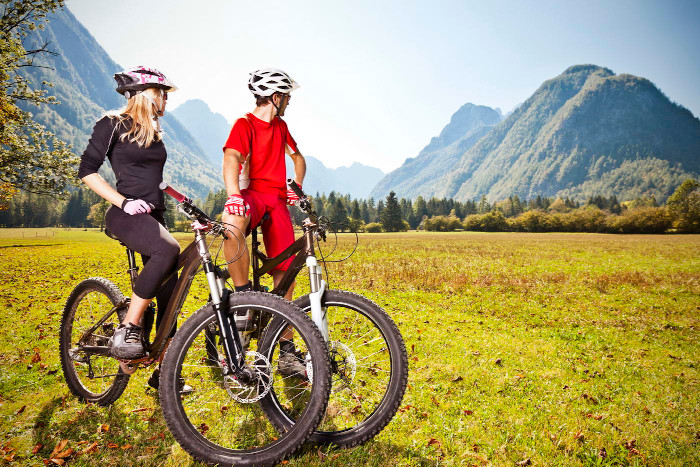

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [4]:
# Загружаем данные
data = pd.read_csv('Task_2/day.csv', index_col=0)

# Разделяем на обучающую и тестовую части
train = data.sample(frac=0.8, random_state=200)
test = data.drop(train.index)

# Указываем вещественные, категориальные и целевые признаки
real_features = ['temp', 'atemp', 'hum', 'windspeed']
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
target_feature = 'cnt'

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

<Axes: title={'center': 'Влияние дня недели'}, xlabel='День недели', ylabel='Количество велосипедов'>

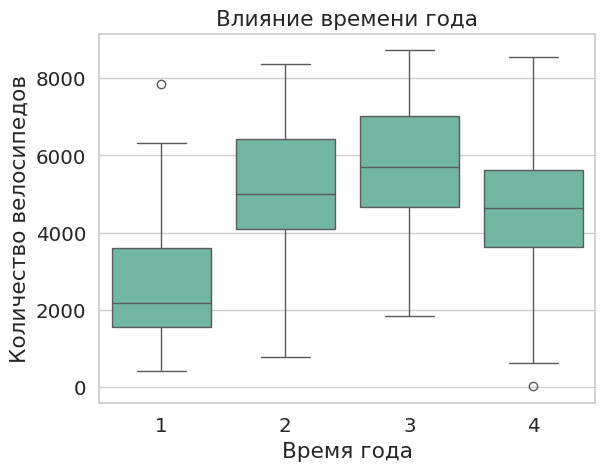

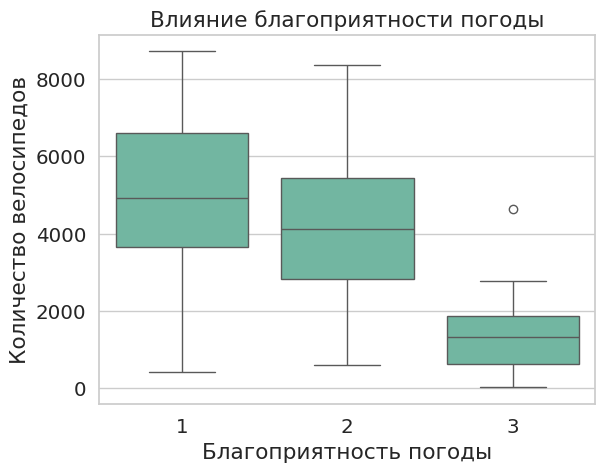

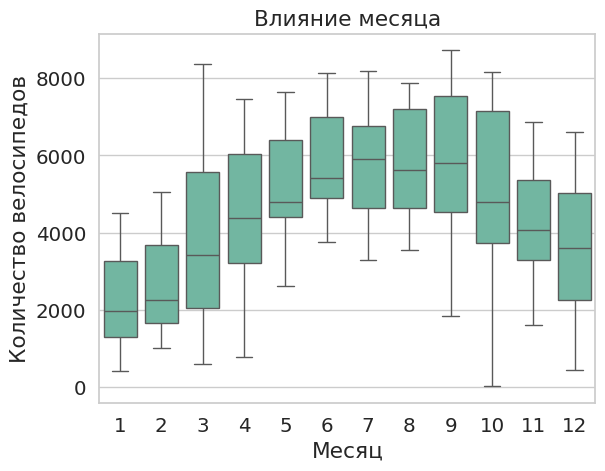

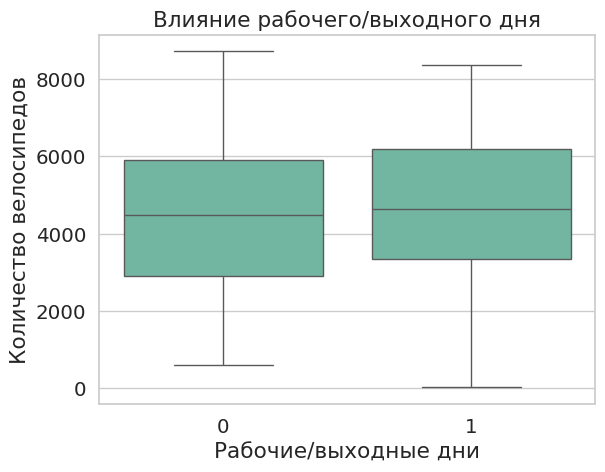

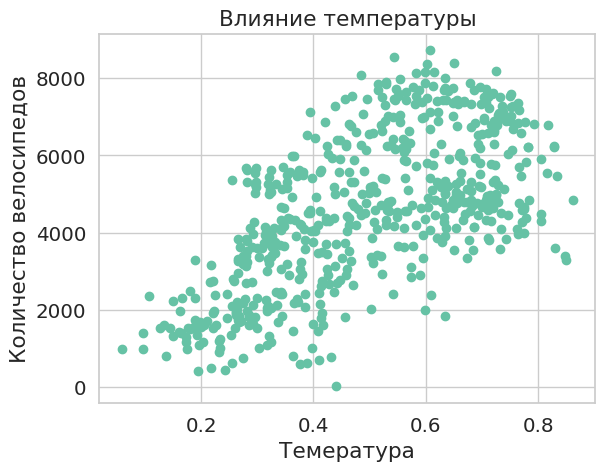

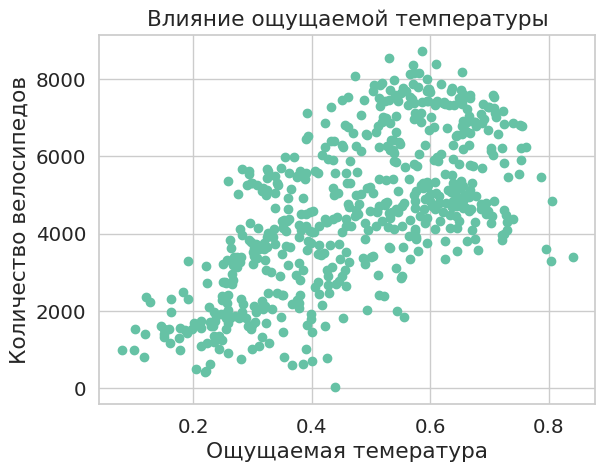

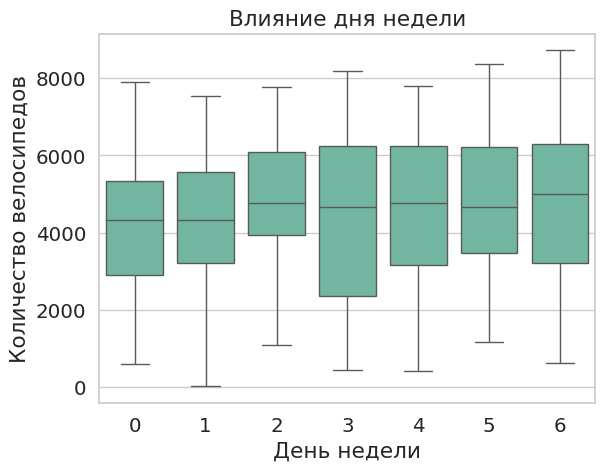

In [5]:
plt.figure()
plt.xlabel('Время года')
plt.ylabel('Количество велосипедов')
plt.title('Влияние времени года')
sns.boxplot(data=train, x='season', y='cnt')

plt.figure()
plt.xlabel('Благоприятность погоды')
plt.ylabel('Количество велосипедов')
plt.title('Влияние благоприятности погоды')
sns.boxplot(data=train, x='weathersit', y='cnt')

plt.figure()
plt.xlabel('Месяц')
plt.ylabel('Количество велосипедов')
plt.title('Влияние месяца')
sns.boxplot(data=train, x='mnth', y='cnt')

plt.figure()
plt.xlabel('Рабочие/выходные дни')
plt.ylabel('Количество велосипедов')
plt.title('Влияние рабочего/выходного дня')
sns.boxplot(data=train, x='workingday', y='cnt')

temp_cnt = train[['temp', 'cnt']].sort_values('temp')
plt.figure()
plt.xlabel('Темература')
plt.ylabel('Количество велосипедов')
plt.title('Влияние температуры')
plt.scatter(temp_cnt['temp'], temp_cnt['cnt'])

atemp_cnt = train[['atemp', 'cnt']].sort_values('atemp')
plt.figure()
plt.xlabel('Ощущаемая темература')
plt.ylabel('Количество велосипедов')
plt.title('Влияние ощущаемой температуры')
plt.scatter(atemp_cnt['atemp'], atemp_cnt['cnt'])

plt.figure()
plt.xlabel('День недели')
plt.ylabel('Количество велосипедов')
plt.title('Влияние дня недели')
sns.boxplot(data=train, x='weekday', y='cnt')

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?\
\- Да, есть - например, как видно из первого графика, есть выбросы зимой (большое использование) и осенью (малое использование). Также были желающие покататься в плохую погоду (см. график зависимости от благоприятности погоды). Но на других графиках выбросов не наблюдается.
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**
- Категориальные признаки (например, месяц, день недели) были построены в ящиках с усами - так можно легко анализировать данные (видны разбросы, медианы). Вещественные признаки (например, температура) были построены в виде набора точек.
- Больше всего велосипедами пользовались летом и весной (вполне ожидаемо).
- Люди предпочитают для этого более тёплую погоду (вполне ожидаемо).
- По всем дням недели использование велосипедов находится на одном уровне, немного больше - в воскресение, и поменьше - в понедельник и вторник. Но ожидалось, что в выходные будет заметный прирост, чем в рабочие дни. Опровержение этого представления показано на соответствующем графике.
- Сильно влияют погодные условия.
- Распределения по температуре и ощущаемой температуре практически совпадают. Поэтому можно учитывать только один из этих признаков.

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще. *Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a)** Избавиться от выбросов у категориальных признаков. Для этого найдём значения выбросов на глаз из графиков и удалим значения, лежащие в некоторой окрестности от них.\
**b)** Закодировать категориальные признаки.

Реализуйте данную процедуру.

In [6]:
# Убираем выбросы
train = train.drop(train[((train['season'] == 1) & (train['cnt'] > 7000)) | ((train['season'] == 4) & (train['cnt'] < 500))].index)
train = train.drop(train[((train['weathersit'] == 3) & (train['cnt'] > 4000))].index)

# Кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse_output=False)              # Объявляем кодировщик
train_categorial = encoder.fit_transform(train[categorial_features])    # Обучаем и кодируем

# Соединяем вещественные и категориальные признаки
X_train = np.hstack([train[real_features], train_categorial])

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [7]:
model = LinearRegression(fit_intercept=True)        # Объявляем модель
model.fit(X_train, train[target_feature])           # Обучаем

# Смотрим на полученные коэффициенты
print("Коэффициенты:\n", model.coef_, "\n")
print("Свободный коэффициент:\n", model.intercept_)

Коэффициенты:
 [-5.98129428e+03  1.39805024e+04 -2.78041377e+03 -2.19496453e+03
  1.34021765e+03  8.86067667e+02  1.55903320e+03 -2.30966907e+02
  5.80430853e+01 -6.63140464e+02 -4.88340975e+02 -6.54818288e+02
 -9.84495208e+02 -4.42491159e+02  3.10227669e+02 -5.37993809e+01
 -3.96738554e+02 -2.64552907e+02 -4.43040476e+02 -2.22455646e+02
 -3.84923445e+01  8.22648687e+01  8.33681884e-02  9.54684473e+01
  3.64127894e+02  3.59909169e+02 -2.73584982e+02 -2.35374461e+03] 

Свободный коэффициент:
 2293.907439085242


Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

Для начала посмотрим на данные, чтобы понять, есть ли выбросы:

<Axes: title={'center': 'Влияние дня недели'}, xlabel='День недели', ylabel='Количество велосипедов'>

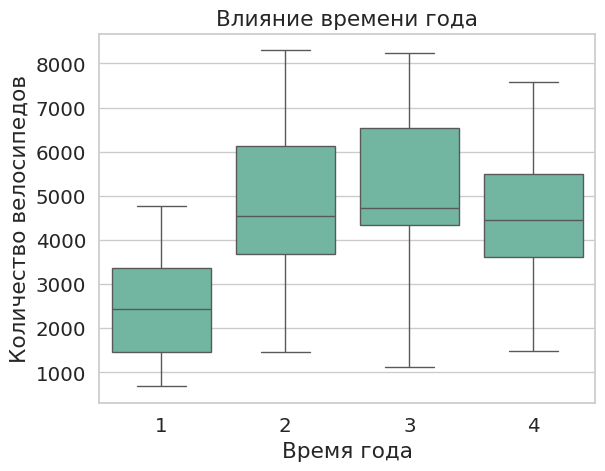

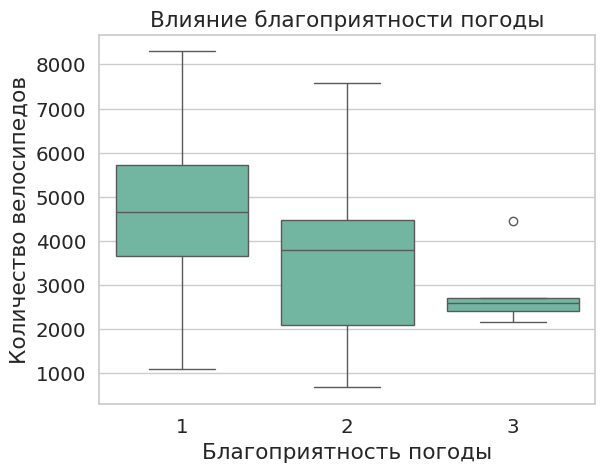

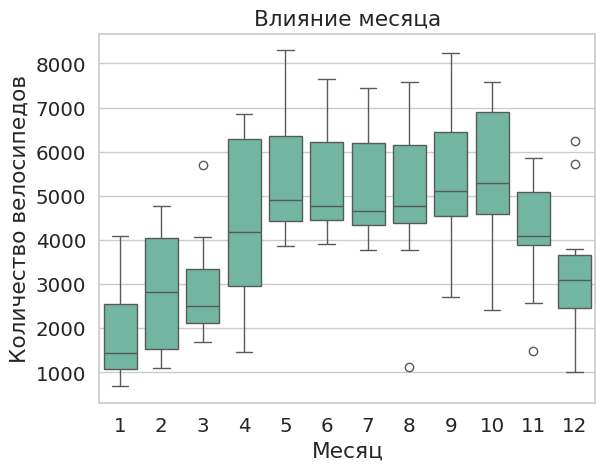

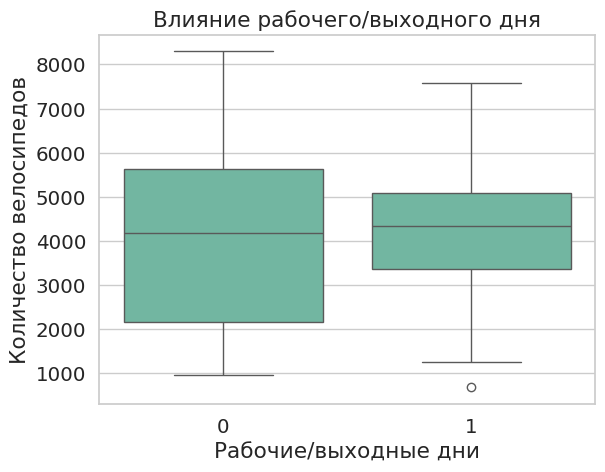

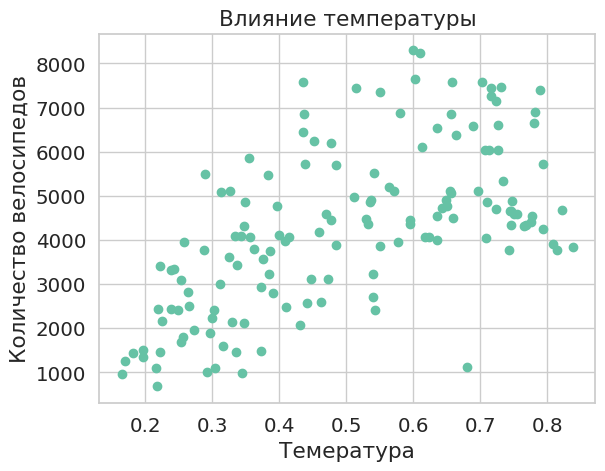

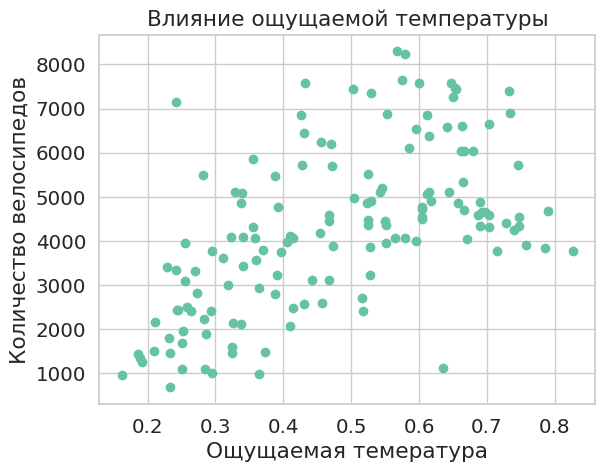

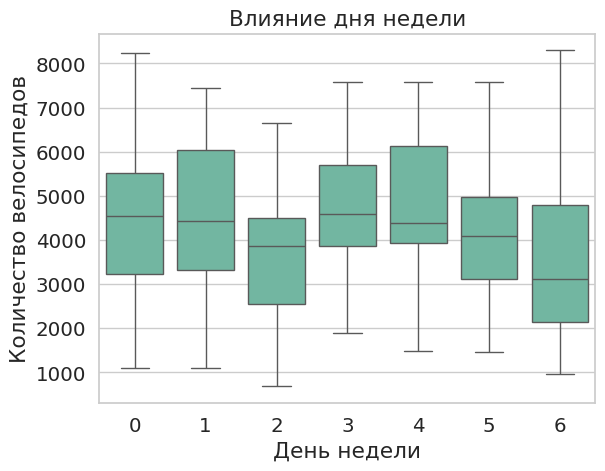

In [8]:
plt.figure()
plt.xlabel('Время года')
plt.ylabel('Количество велосипедов')
plt.title('Влияние времени года')
sns.boxplot(data=test, x='season', y='cnt')

plt.figure()
plt.xlabel('Благоприятность погоды')
plt.ylabel('Количество велосипедов')
plt.title('Влияние благоприятности погоды')
sns.boxplot(data=test, x='weathersit', y='cnt')

plt.figure()
plt.xlabel('Месяц')
plt.ylabel('Количество велосипедов')
plt.title('Влияние месяца')
sns.boxplot(data=test, x='mnth', y='cnt')

plt.figure()
plt.xlabel('Рабочие/выходные дни')
plt.ylabel('Количество велосипедов')
plt.title('Влияние рабочего/выходного дня')
sns.boxplot(data=test, x='workingday', y='cnt')

temp_cnt = test[['temp', 'cnt']].sort_values('temp')
plt.figure()
plt.xlabel('Темература')
plt.ylabel('Количество велосипедов')
plt.title('Влияние температуры')
plt.scatter(temp_cnt['temp'], temp_cnt['cnt'])

atemp_cnt = test[['atemp', 'cnt']].sort_values('atemp')
plt.figure()
plt.xlabel('Ощущаемая темература')
plt.ylabel('Количество велосипедов')
plt.title('Влияние ощущаемой температуры')
plt.scatter(atemp_cnt['atemp'], atemp_cnt['cnt'])

plt.figure()
plt.xlabel('День недели')
plt.ylabel('Количество велосипедов')
plt.title('Влияние дня недели')
sns.boxplot(data=test, x='weekday', y='cnt')

In [9]:
# Убираем выбросы у тестовой выборки
test = test.drop(test[((test['mnth'] == 3) & (test['cnt'] > 5000)) | ((test['mnth'] == 8) & (test['cnt'] < 2000)) | ((test['mnth'] == 11) & (test['cnt'] < 2000)) | ((test['mnth'] == 12) & (test['cnt'] > 5000))].index)
test = test.drop(test[((test['weathersit'] == 3) & (test['cnt'] > 4000))].index)
test = test.drop(test[((test['workingday'] == 1) & (test['cnt'] < 1000))].index)

Затем преобразуем признаки, выполняем предсказание и считаем ошибку предсказания по трём метрикам:

In [10]:
test_categorial = encoder.transform(test[categorial_features])
X_test = np.hstack([test[real_features], test_categorial])

# Предсказание
test_preds = model.predict(X_test)

# Считаем ошибку
rmse = np.sqrt(((test[target_feature] - test_preds) ** 2).mean())
mae = np.abs(test[target_feature] - test_preds).mean()
mape = 100 * (np.abs(test[target_feature] - test_preds) / test[target_feature]).mean()

print("RMSE:\t", rmse)
print(" MAE:\t", mae)
print("MAPE:\t", mape)

RMSE:	 1409.0718371071941
 MAE:	 1138.2689629957113
MAPE:	 31.709869503920096


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

In [11]:
estimation = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ train[target_feature]
print(estimation)
print(np.linalg.det(X_train.T @ X_train))

[-2.37193952e+07  2.56398125e+07 -2.43228436e+05 -1.45633284e+06
 -1.56560668e+05 -8.34268156e+04 -1.68976669e+05 -1.87869503e+05
  3.50970261e+03  3.09174379e+04  2.77529599e+05  4.57103199e+05
  4.54336738e+05  4.39928493e+05  2.90258356e+05  4.50677126e+04
 -1.66608622e+05 -1.38968738e+05  1.21907963e+06 -5.20096420e+04
  8.65134802e+04  4.35550901e+04 -2.71899401e+04  3.89707252e+04
  6.05944601e+02 -1.93062945e+04 -4.56781230e+02 -2.77147173e+03]
-1.0254604307712197e+25


Матрица $\bm{X}^T \bm{X}$ близка к вырожденной (детерминант практически ноль), а итоговая оценка имеет очень большие элементы. Проблема заключается в том, что мы имеем признаки, которые очень сильно коррелируют друг с другом, например, температура и ощущаеммая температура. Избавившись от них, можно добиться адекватных значений оценки.

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [12]:
# Уберём коррелирующие признаки
categorial_features_filtered = ['mnth', 'holiday', 'weekday', 'weathersit']
real_features_filtered = ['temp', 'hum', 'windspeed']

encoder_filtered = OneHotEncoder(drop='first', sparse_output=False)
train_categorial_filtered = encoder_filtered.fit_transform(train[categorial_features_filtered])

X_train_filtered = np.hstack([train[real_features_filtered], train_categorial_filtered])

# Считаем оценку
estimation = np.linalg.inv(X_train_filtered.T @ X_train_filtered) @ X_train_filtered.T @ train[target_feature]
print(estimation)

[ 7732.72977794  -267.57501994  -768.08387331   248.10728797
   828.04786435   959.2191901    742.0545855    424.33690024
  -278.84921598   170.50549401  1180.75718308  1665.57758804
  1552.61467604  1114.02055993  -966.44889789   452.27219752
   646.35913212   738.49658308   722.89693623   818.58567905
   710.88958107  -576.60692921 -3203.07687993]


In [13]:
test_categorial_filtered = encoder_filtered.transform(test[categorial_features_filtered])
X_test_filtered = np.hstack([test[real_features_filtered], test_categorial_filtered])

# Делаем предсказание
test_preds_filtered = estimation @ X_test_filtered.T

# Считаем ошибку
rmse_filtered = np.sqrt(((test[target_feature] - test_preds_filtered) ** 2).mean())
mae_filtered = np.abs(test[target_feature] - test_preds_filtered).mean()
mape_filtered = 100 * (np.abs(test[target_feature] - test_preds_filtered) / test[target_feature]).mean()

print("RMSE:\t", rmse_filtered)
print(" MAE:\t", mae_filtered)
print("MAPE:\t", mape_filtered)

RMSE:	 1319.9896193101386
 MAE:	 1127.675294755081
MAPE:	 30.445227134672905


Сделайте выводы.

**Выводы:**
- Обе модели линейной регрессии показывает ошибку порядка 30%, причём рассчитанная по формуле из лекции оценка даёт более точный результат по всем метрикам.
- В данных наблюдались сильно коррелирующие признаки, избавившись от них, мы получили коэффициенты меньшего порядка. 

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии в матричном виде. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

Теперь надо найти градиент такой функции: $ F(\theta) = (Y - X \theta)^T(Y - X\theta) + \lambda \theta^T \theta$.
$$ \nabla F(\theta) = - 2 X^T Y + 2 X^TX\theta + 2 \lambda E \theta = 0 $$

Отсюда получаем:
$$ \^{\theta} = (X^T X + \lambda E)^{-1} X^T Y$$

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии в матричном виде. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

GD: $ \quad \theta_{t + 1} = \theta_{t} - \eta (X^T(X\theta - Y) + \lambda E \theta) $\
SGD: $ \quad \theta_{t + 1} = \theta_{t} - \eta \frac{n}{k} (X_{I}^T (X_{I}\theta - Y) + \lambda E \theta), \quad$ где $I = \{i_1, ... , i_k\}$, $\quad i_1, ..., i_k \sim \cup\{1, ..., n\}$, $\quad X_I$ - матрица, составленная из строк исходной матрицы $X$ с индексами из $I$

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

- Признаки могут иметь различные границы в своих единицах измерения, но регуляризационный коэффициент $\lambda$ одинаков для всех, поэтому все признаки нужно привести к единой шкале.

---
### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2, используя указанные в ней признаки.

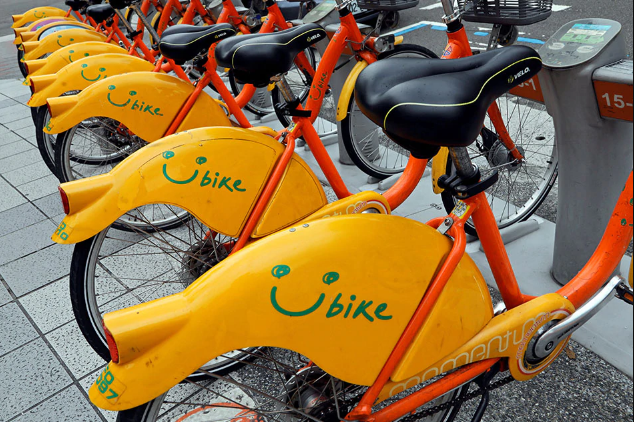

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [21]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''
        
        self.lambd = lambd
        self.fit_intercept = fit_intercept
        self.estimation = None
        
        
    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        
        # Посчитайте оценки коэффициентов и, возможно, 
        # еще что-то, что пригодится в predict.

        if (self.fit_intercept):
            np.hstack([np.ones(shape=(X.shape[0], 1)), X])
        
        self.estimation = np.linalg.inv(X.T @ X + self.lambd * np.eye(X.shape[1])) @ X.T @ Y
        
        return self
    
    
    def predict(self, X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        
        # Посчитайте предсказания
        predictions = X @ self.estimation
        
        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/lecture3_3.pdf">презентации</a> с занятия. Далее в данной задаче можно копировать код из предыдущих задач или использовать готовые инструменты.

In [7]:
# Загружаем данные
data = pd.read_csv('Task_2/day.csv', index_col=0)

# Разделяем на обучающую, валидационную и тестовую части
train, test = train_test_split(data, test_size=0.4, random_state=1)
val, test = train_test_split(test, test_size=0.5, random_state=1)

# Указываем вещественные, категориальные и целевые признаки
real_features = ['temp', 'atemp', 'hum', 'windspeed']
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
target_feature = 'cnt'

<Axes: title={'center': 'Влияние дня недели'}, xlabel='День недели', ylabel='Количество велосипедов'>

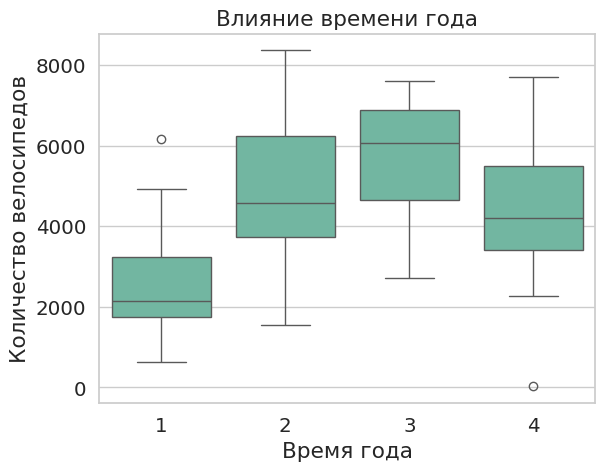

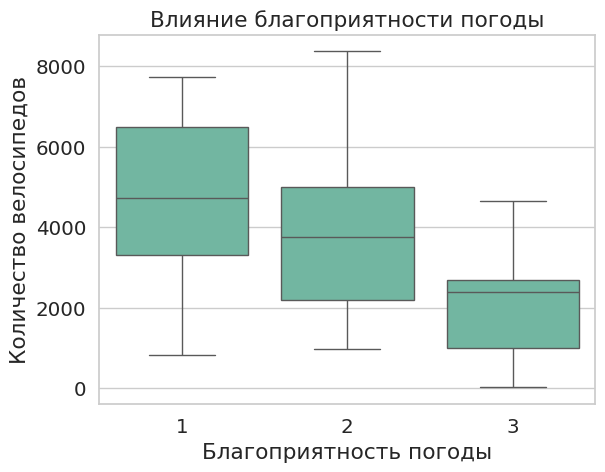

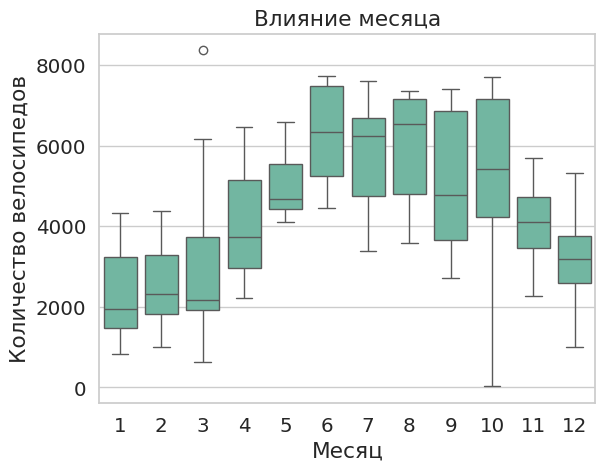

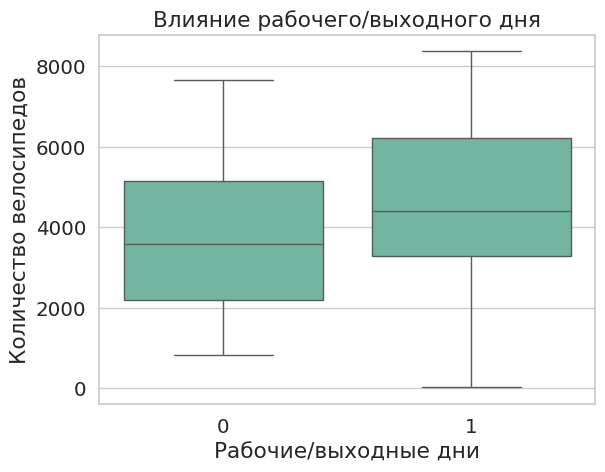

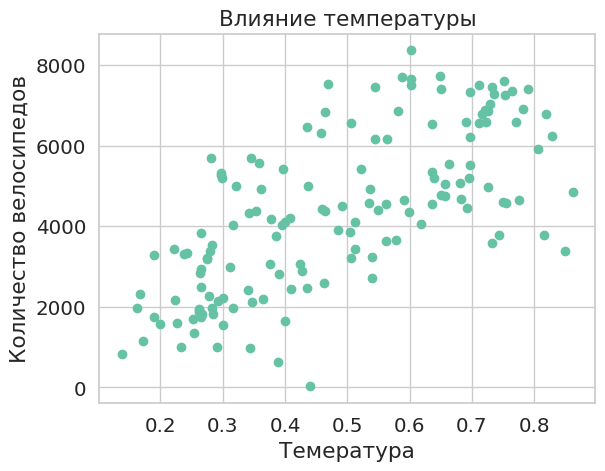

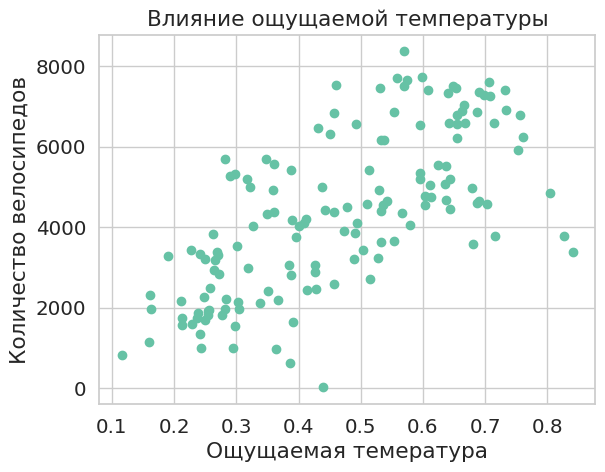

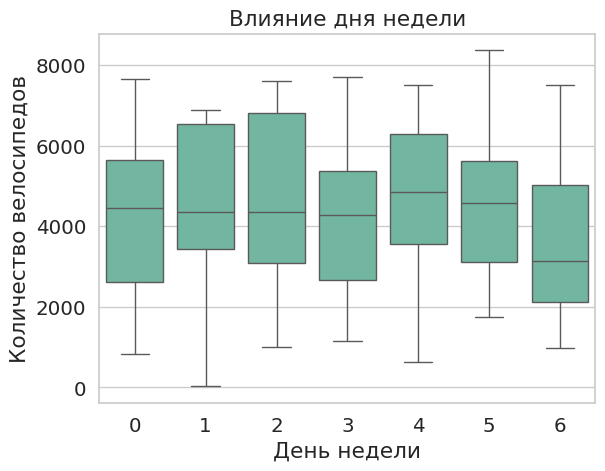

In [8]:
plt.figure()
plt.xlabel('Время года')
plt.ylabel('Количество велосипедов')
plt.title('Влияние времени года')
sns.boxplot(data=test, x='season', y='cnt')

plt.figure()
plt.xlabel('Благоприятность погоды')
plt.ylabel('Количество велосипедов')
plt.title('Влияние благоприятности погоды')
sns.boxplot(data=test, x='weathersit', y='cnt')

plt.figure()
plt.xlabel('Месяц')
plt.ylabel('Количество велосипедов')
plt.title('Влияние месяца')
sns.boxplot(data=test, x='mnth', y='cnt')

plt.figure()
plt.xlabel('Рабочие/выходные дни')
plt.ylabel('Количество велосипедов')
plt.title('Влияние рабочего/выходного дня')
sns.boxplot(data=test, x='workingday', y='cnt')

temp_cnt = test[['temp', 'cnt']].sort_values('temp')
plt.figure()
plt.xlabel('Темература')
plt.ylabel('Количество велосипедов')
plt.title('Влияние температуры')
plt.scatter(temp_cnt['temp'], temp_cnt['cnt'])

atemp_cnt = test[['atemp', 'cnt']].sort_values('atemp')
plt.figure()
plt.xlabel('Ощущаемая темература')
plt.ylabel('Количество велосипедов')
plt.title('Влияние ощущаемой температуры')
plt.scatter(atemp_cnt['atemp'], atemp_cnt['cnt'])

plt.figure()
plt.xlabel('День недели')
plt.ylabel('Количество велосипедов')
plt.title('Влияние дня недели')
sns.boxplot(data=test, x='weekday', y='cnt')

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее во второй задаче.

In [9]:
# Убираем выбросы
train = train.drop(train[((train['season'] == 1) & (train['cnt'] > 6000)) | ((train['season'] == 4) & (train['cnt'] < 500))].index)
train = train.drop(train[((train['mnth'] == 3) & (train['cnt'] > 7000))].index)

# Кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse_output=False)              # Объявляем кодировщик
train_categorial = encoder.fit_transform(train[categorial_features])    # Обучаем и кодируем

# Соединяем вещественные и категориальные признаки
X_train = np.hstack([train[real_features], train_categorial])

In [10]:
val = val.drop(val[((val['season'] == 1) & (val['cnt'] > 6000)) | ((val['season'] == 4) & (val['cnt'] < 500))].index)
val = val.drop(val[((val['mnth'] == 3) & (val['cnt'] > 7000))].index)

val_categorial = encoder.transform(val[categorial_features])
X_val = np.hstack([val[real_features], val_categorial])

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [20]:
grid = np.logspace(-3.0, 4.0, num=200)
predictions = []

for param in grid:
    model = RidgeRegression(param)
    model.fit(X_train, train[target_feature])
    predictions.append(model.predict(X_val))

(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)


(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144,)
(144, 28)
(144

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

In [15]:
rmse = []
mae = []
mape = []

for i in range(len(predictions)):
    rmse.append(np.sqrt(((val[target_feature] - predictions[i]) ** 2).mean()))
    mae.append(np.abs(val[target_feature] - predictions[i]).mean())
    mape.append(100 * (np.abs(val[target_feature] - predictions[i]) / val[target_feature]).mean())

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

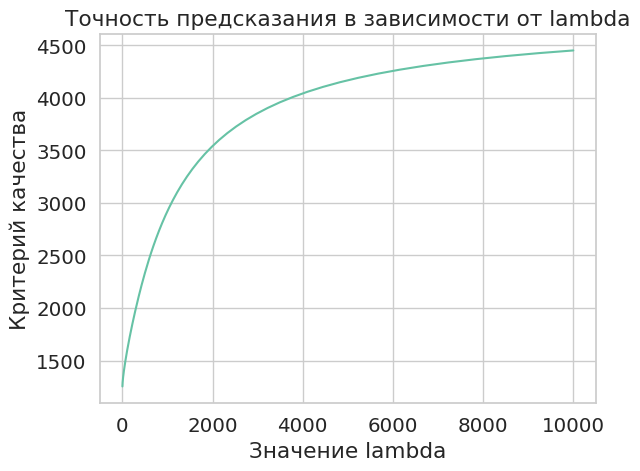

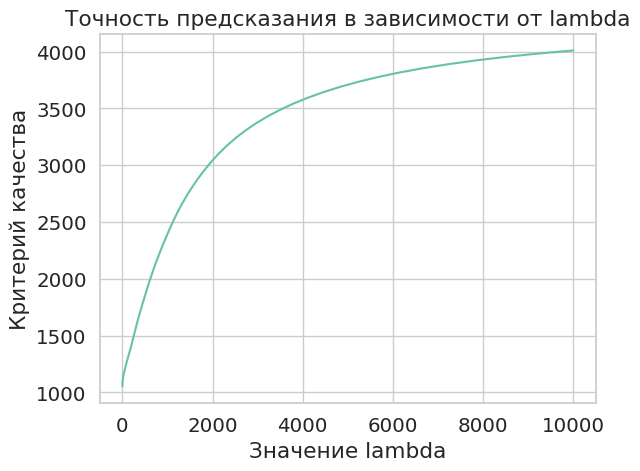

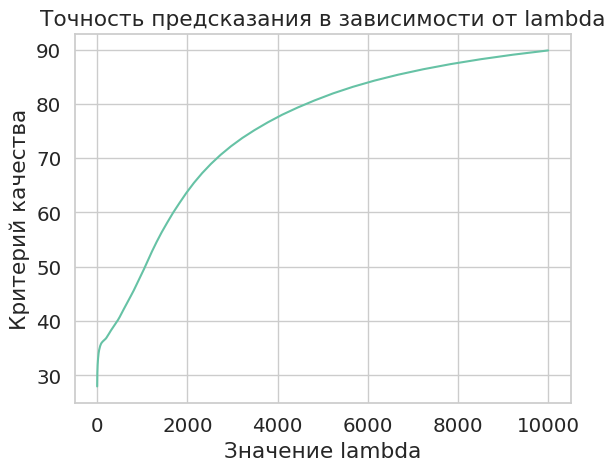

In [16]:
plt.figure()
plt.plot(grid, rmse)
plt.xlabel('Значение lambda')
plt.ylabel('Критерий качества')
plt.title('Точность предсказания в зависимости от lambda')
plt.show()

plt.figure()
plt.plot(grid, mae)
plt.xlabel('Значение lambda')
plt.ylabel('Критерий качества')
plt.title('Точность предсказания в зависимости от lambda')
plt.show()

plt.figure()
plt.plot(grid, mape)
plt.xlabel('Значение lambda')
plt.ylabel('Критерий качества')
plt.title('Точность предсказания в зависимости от lambda')
plt.show()

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

Сделайте выводы.

---
### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

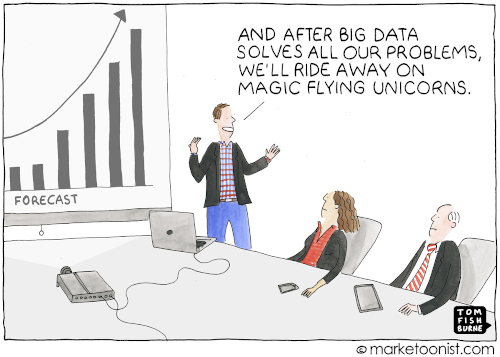

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

Реализуйте самостоятельно процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Обратите внимание, что при неудачном выборе величины шага градиентного спуска $\eta$ (learning rate) метод может не сойтись. Пример приводился на лекции.

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Посчитайте ошибку на тестовой выборке.

Сделайте выводы.